## How are in-demand skills trending for Data Analysts?

### Methology

* Aggregate skill counts monthly
* Re-analyze based on percentage of total jobs
* Plot the monthly skill demand

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#filtering Data for US and focusing on just Data Analytics

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Analyst')].copy()

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']..."
332,Data Analyst,Data Analyst,"Mossville, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-27 13:01:50,False,False,United States,None,NaN,NaN,Aditi Consulting,"[python, matlab, c++, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
385,Data Analyst,Data Analyst,"Waukesha, WI",via Trabajo.org,Full-time,False,"Illinois, United States",2023-02-11 13:04:12,False,True,United States,None,NaN,NaN,Uline,"[vba, sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
476,Data Analyst,Data Analyst,"St Peters, MO",via Trabajo.org,Full-time,False,"Illinois, United States",2023-01-15 13:02:07,True,True,United States,None,NaN,NaN,"BizzyCar, Inc.",[tableau],{'analyst_tools': ['tableau']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784841,Data Analyst,Data Analyst,California,via Trabajo.org,Full-time,False,"California, United States",2023-01-17 06:17:12,False,False,United States,None,NaN,NaN,Blue Shield of CA,"[sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
784929,Data Analyst,Data Analyst,"Pleasant Hill, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-12 06:01:41,False,True,United States,None,NaN,NaN,Special Olympics of Northern California,"[sql, azure, sheets, spreadsheet, excel, share...","{'analyst_tools': ['sheets', 'spreadsheet', 'e..."
785078,Data Analyst,Data Analyst,"Columbia, SC",via Trabajo.org,Full-time,False,Georgia,2023-03-24 06:54:14,True,False,United States,None,NaN,NaN,"Hornet Staffing, Inc.","[sql, visual basic, sas, sas, db2]","{'analyst_tools': ['sas'], 'databases': ['db2'..."
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,"[sql, python, r, azure, snowflake, databricks,...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."


In [3]:
#Creating new columns just to have months 

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month  #to extract month 

df_DA_US['job_posted_month_no']

36        11
155        1
332        4
385        2
476        1
          ..
784841     1
784929     5
785078     3
785539     1
785685     7
Name: job_posted_month_no, Length: 14086, dtype: int32

In [4]:
#exploding the job skills column so then we can get the count for all the skills

df_DA_US_explode = df_DA_US.explode('job_skills')

df_DA_US_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,sql,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,python,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,unix,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,excel,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,databricks,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,tableau,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,excel,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7


In [5]:
#pivioting data 
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value= 0)

#new row useful for sorting columns
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

#NOW we will sort the values by the row so we will use .loc and use sort_values() method, but this will give us sorting by count but to access the
#columns we need its name because we want to sort columns using row to have higest skills on the first. Therefore, we used .index to get the name of
#the skills from highest to lowest counts.

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

#we have sorted the columns using Total row now we dont need so we will drop it
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot



job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [6]:
#this is the data we needed and we can plot this just like we did in our advance section. But we want to show the percentage of likelyhood
#of these skills are appering so we will divide each month's job skills by total job postings for that month.

#first we need to get all the job counts for the each month. We will use groupby() on job_posted_month and use size() to get all the counts
#of the jobs for that month. 

#lets do it. REMEMBER WE WILL USE ORIGINAL df_DA_US to get total job postigns.

DA_total = df_DA_US.groupby('job_posted_month_no').size()

In [7]:
#now we have the total job postigns for each month now we need to divide the pivot table's each skill rows with this total. WE could use for
#loop but we will use panda's .div() method. Indside () we need to pass any single or multiple data structure ot list like obj as first arg.
#then we will give axis to specify we want to perform by index or on a column. for index(ie row) we will give axis = 0 and 1 for columns

df_DA_US_percent = df_DA_US_pivot.div(DA_total/100, axis=0)  #we don't want the decimal so we are dividing by 100

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
7,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
8,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


In [8]:
#reseting the index so we can have job_posted_month as column which we can use to formating to have month names
df_DA_US_percent = df_DA_US_percent.reset_index()

#creating new column to have month name we will use lambda function to apply in on the whole column.
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

#we are setting the new column which has month no as our index so easness in plotting.
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')

#we are droping column to it does appear on the plot
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


In [12]:
#we only want top 5 so we will use iloc
df_plot = df_DA_US_percent.iloc[:,:5]

df_plot

job_skills,sql,excel,tableau,python,power bi
job_posted_month,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542
Feb,60.903427,42.367601,31.775701,29.439252,23.520249
Mar,58.883994,42.584435,33.994126,29.368576,20.337739
Apr,61.723886,42.147553,33.747261,30.752374,21.329438
May,61.072664,42.387543,31.747405,29.065744,21.712803
Jun,61.474731,40.679370,32.725766,32.808616,22.535211
Jul,58.638743,45.130890,30.994764,30.575916,19.895288
Aug,55.445545,45.332390,33.946252,32.531825,20.650636
Sep,56.658879,39.252336,32.359813,29.556075,21.378505


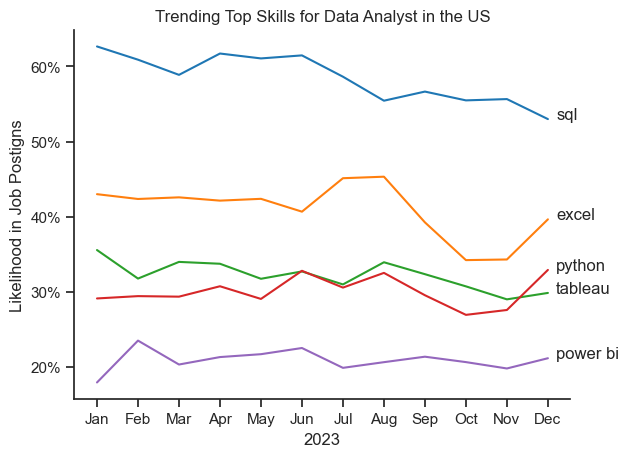

In [ ]:
#lets plot
sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.despine()

plt.title('Trending Top Skills for Data Analyst in the US')
plt.ylabel('Likelihood in Job Postigns')
plt.xlabel('2023')
plt.legend().remove()

#we want to change the format of y axis to to have percentage in it. we could use subplots then change y axis or we can do as below
 
from matplotlib.ticker import PercentFormatter  #to have the axis label in percentage. |
ax = plt.gca()                                                              
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))




#so we want the skill names at the end of the line for each skills. To do that we will use text function. for that to work we need x and y position
#think for text we need just the cordinates. we we know we have 5 lines in grap so we need five co ordinates. we will use for loop for it

#so we will use range which generates numbers 5 will be exluded.

#now for x co ordinates we know its 12 so will give 11 to see then adjust it as we needed. and for the y we need the co ordinate we will take last
#value of the each skill. then for the text that we want to plot we will use.columns to acess columns names and i will take take value and plot that
#on the plot.

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
